# <center>Project-Based Assignment CLO-4</center>

<b>Topik</b>
Implementation of Ensemble Method on Classification Task

<b>Anggota Kelompok</b>
1. Deaz Setyo Nugroho - 1301210248
2. Stefhan Salim - 1301210529
3. Valent Fauzan Al Rasyid - 1301213194

# Load Dataset

In [ ]:
import numpy as np
import pandas as pd

# For Data Preprocessing and visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Sumber to: https://stackoverflow.com/questions/56611698/pandas-how-to-read-csv-file-from-google-drive-public
url= 'https://drive.google.com/file/d/1DJNq14a4mPizTS0iC8qMCpi3Oi5OJ0jw/view?usp=drive_link'
url= 'https://drive.google.com/uc?id=' + url.split('/')[-2]

wine_white = pd.read_csv(url,sep=';')

In [ ]:
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Data Exploration

In [ ]:
#Cek null value dalam dataset wine_white
wine_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

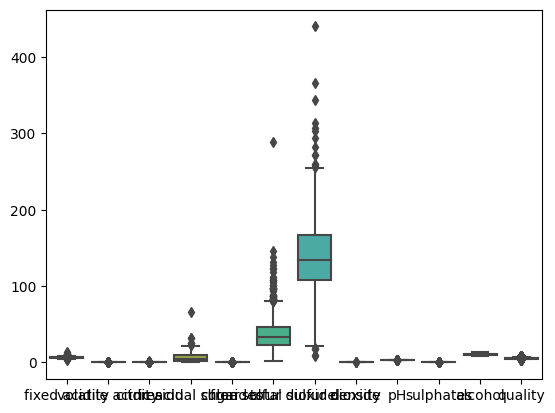

In [ ]:
#melihat outlier dalam dataset wine_white
sns.boxplot(data=wine_white)
plt.show()

In [ ]:
from scipy import stats

#Menghapus outlier dalam dataset wine_white
z_scores = stats.zscore(wine_white)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

#Creating new datframe with with the filtered values
wine_new = wine_white[filtered_entries]

In [ ]:
#Identifying number of rows in new dataframe with the filtered values
wine_new_rows = len(wine_new)

#Number of rows in the original dataframes
wine_rows = len(wine_white.index)

#Reduction in the rows of the dataset
wine_reduction = wine_rows - wine_new_rows
wine_reduction_percent = (wine_reduction/wine_rows)*100

print(wine_reduction,"outlier telah dihapus dari dataset wine_white. Artinya, sekitar", round(wine_reduction_percent,2),"% data telah dihilangkan." )

411 outlier telah dihapus dari dataset wine_white. Artinya, sekitar 8.39 % data telah dihilangkan.


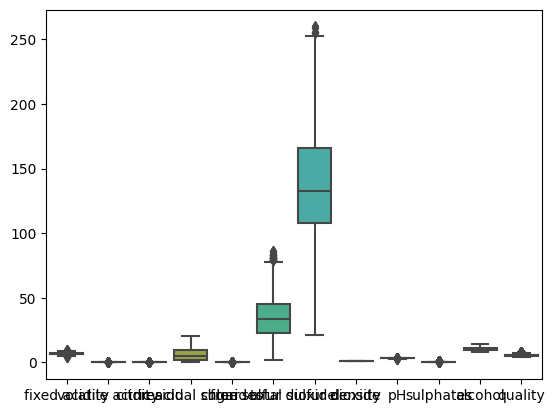

In [ ]:
sns.boxplot(data=wine_new)
plt.show()

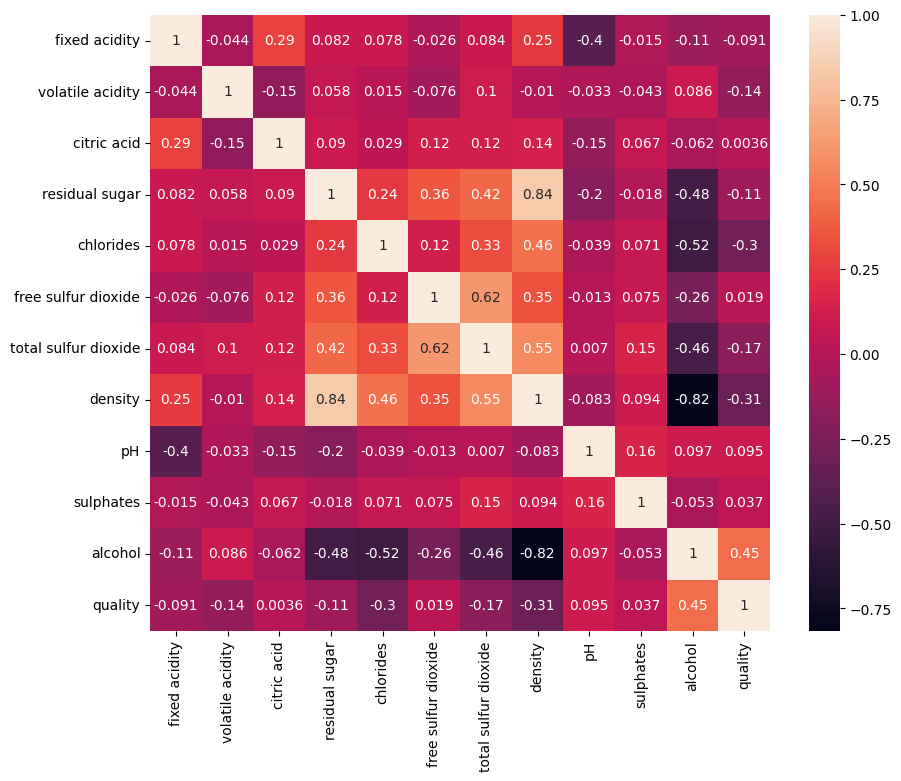

In [ ]:
#heatmap untuk melihat korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(wine_new.corr(), annot=True)

plt.show()

# Data Preprocessing

In [ ]:
# # Menghapus kolom yang tidak digunakan
# columns_to_delete = [
#     "fixed acidity", "volatile acidity", "citric acid",
#     "residual sugar", "chlorides", "free sulfur dioxide",
#     "pH", "sulphates"
# ]

# for column in columns_to_delete:
#   wine_new = wine_new.drop(column, axis=1)

In [ ]:
# membagi quality menjadi 2 class
norm_risk_list = []
for quality in wine_white.quality:
    if quality >= 1 and quality <=4:
        norm_risk_list.append("Jelek")
    elif quality >= 5 and quality <=7:

        norm_risk_list.append("Sedang")
    elif quality >= 8 and quality <=10:
         norm_risk_list.append("Bagus")
wine_white["quality_class"] = np.array(norm_risk_list)
wine_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,Sedang
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,Sedang
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,Sedang
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Sedang
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Sedang
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,Sedang
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,Sedang
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,Sedang
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,Sedang


# Normalisasi

In [ ]:
# Normalize data
def normalize(dataset):
  return (dataset - dataset.min()) / (dataset.max() - dataset.min())

In [ ]:
# Membagi data testing dan training. Rasio ...
split = int(0.2 * wine_new.shape[0])
test, train = (
        wine_new.iloc[0: split].reset_index(drop=True),
        wine_new.iloc[split:].reset_index(drop=True)
)

x_test = normalize(test.drop("quality", axis=1))
y_test = normalize(test.quality)
x_train = normalize(train.drop("quality", axis=1))
y_train = normalize(train.quality)

#### Latar Belakang
Silahkan double click cell ini dan tulis latar belakang!

In [ ]:
# Data Preprocessing
# Write your code here



In [ ]:
# Exploration Data Analysis
# Write your code here



#### Ringkasan Metode
Silahkan double click cell ini dan tulis ringkasan metode!

### Kelas Node ID3

In [ ]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value # Output dari tree

    def is_leaf_node(self):
        return self.value is not None

### Kelas **ID3**
ID3 dibuat berdasarkan nilai entropi dan juga nilai information gain. Adapun nilai dari entropi dapat dihitung dengan:
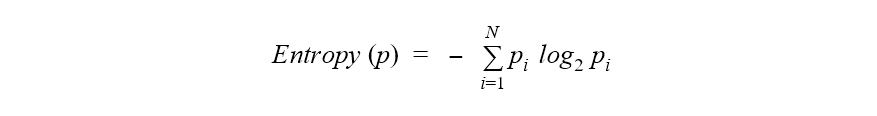
sedangkan nilai dari information gain dihitung dengan mengurangi entropi dari data saat ini dengan data setelah suatu fitur telah dihilangkan



In [ ]:
class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None


    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)


    # Mulai membangun tree
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # Penentuan apakah perlu lanjut buat node pada decision tree
        if (depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # Menentukan fitur apa yang menciptakan split terbaik (syarat split ke kedalaman selanjutnya)
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # Membuat child dari node tertentu
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    # Menentukan fitur apa yang paling bagus untuk di-split
    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            # Cari nilai information gain dari setiap kolom
            for thr in thresholds:
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    # Mencari nilai gain dari suatu kolom
    def _information_gain(self, y, X_column, threshold):
        # Menghitung entropi dari node saat ini
        parent_entropy = self._entropy(y)

        # Membuat child node
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # Mendapatkan information gain dari keseluruhan
        information_gain = parent_entropy - child_entropy
        return information_gain

    # Membagi fitur (X) dari tabel berdasarkan nilai treshold
    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs


    # Menghitung entropi dari sebuah kolom
    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    # Menemukan label output apa yang paling banyak pada saat ini
    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value


    # Fungsi yang digunakan setelah proses training ID3 selesai
    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)


### Kelas Random Forest

In [ ]:
class RandomForest:
    def __init__(self, n_trees=5, max_depth=25, min_samples_split=2, n_feature=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_feature
        self.trees = []

    def fit(self, X, y):
        self.trees = []

        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth = self.max_depth,
                            min_samples_split = self.min_samples_split,
                            n_features = self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    # Melakukan bootstrapping untuk suatu tree
    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    # Mendapatkan hasil 'voting'
    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    # Fungsi yang digunakan setelah Decision Tree telah selesai dibangun
    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

### Eksplorasi Model


In [ ]:
# Baseline Model dan model eksplorasi
model_baseline = None


In [ ]:
# Model Exploration (at least 3 scheme)
model_eksplor1 = None
model_eksplor2 = None
model_eksplor3 = None

In [ ]:
# Evaluation
# Write your code here



# Hasil dan Analisis
Silahkan double click cell ini dan tulis hasil dan analisis!

# Kesimpulan
Silahkan double click cell ini dan tulis kesimpulan!